In [290]:
# Dibër Turistike Information Center Visitor Analysis
# Alex Sessums

# Data Analysis
import numpy as npe
import pandas as pd
import sqldf as sqldf

# Data Visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


from scipy.interpolate import make_interp_spline


In [291]:
# Load Data from CSV into Dataframe
df = pd.read_csv('/Users/asessums/Desktop/Peace Corps/Dibra Turistike/guest_book.csv', parse_dates=True, index_col=1)
df = df.reset_index()
df.tail(6)

,date,group,party,country,year,month,special
244,2021-09-16,240,2,Czech Republic,2021,9,NaN
245,2021-09-21,241,1,Czech Republic,2021,9,NaN
246,2021-09-21,242,2,England,2021,9,NaN
247,2021-09-22,243,2,Switzerland,2021,9,NaN
248,2021-10-01,244,2,Belgium,2021,10,NaN
249,2021-10-01,245,1,United States,2021,10,NaN


In [292]:
# Inspect Dataframe
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     250 non-null    datetime64[ns]
 1   group    250 non-null    int64         
 2   party    250 non-null    int64         
 3   country  250 non-null    object        
 4   year     250 non-null    int64         
 5   month    250 non-null    int64         
 6   special  2 non-null      object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 13.8+ KB


In [293]:
# New Dataframe that excludes Rally of 300 people on 6/10/2021
df = df[df.party != 300] 
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d %H:%M')
df

,date,group,party,country,year,month,special
0,2017-10-18,1,2,Germany,2017,10,NaN
1,2017-10-18,1,2,Austria,2017,10,NaN
2,2017-10-26,2,1,England,2017,10,NaN
3,2017-10-30,3,2,Czech Republic,2017,10,NaN
4,2017-10-31,4,2,Austria,2017,10,NaN
...,...,...,...,...,...,...,...
245,2021-09-21,241,1,Czech Republic,2021,9,NaN
246,2021-09-21,242,2,England,2021,9,NaN
247,2021-09-22,243,2,Switzerland,2021,9,NaN
248,2021-10-01,244,2,Belgium,2021,10,NaN


In [294]:
# Tourists in Dibër - Distinct Countries
print(df["country"].nunique())

33


In [295]:
# Tourists in Dibër - Top 10 Countries - DF
df_country = df.drop(['group', 'date', 'month', 'year', 'special'], axis=1)
df_country = df_country.groupby('country').sum('party')
df_country = df_country.sort_values(by=['party'], ascending=False)
df_country = df_country.head(10)
df_country

,party
country,
Germany,170
France,69
Netherland,42
Switzerland,31
Czech Republic,30
Belgium,28
Austria,26
Italy,26
England,17


Text(0.5, 0.98, 'Tourists in Dibër - Top 10 Countries')

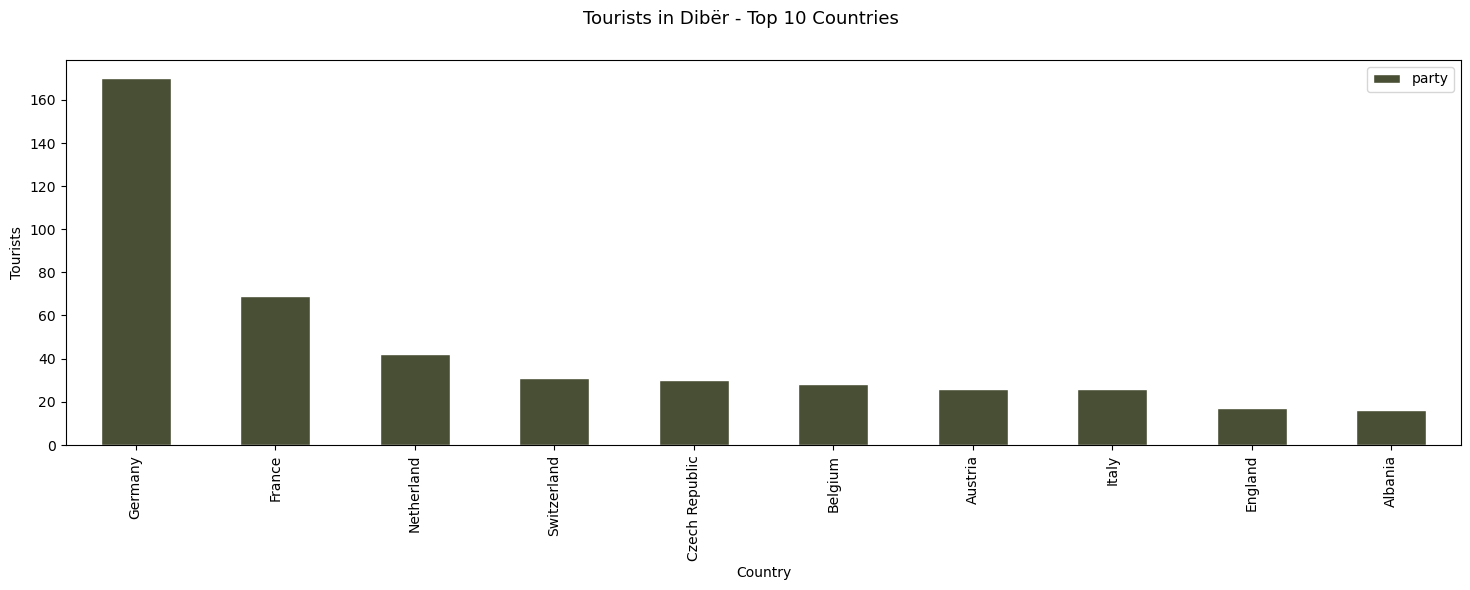

In [296]:
# Tourists in Dibër - Top 10 Countries - Plot
fig = df_country.plot.bar(y='party', use_index=True, figsize=[18,5], color=['#494F34'], edgecolor='white')

plt.xlabel('Country', fontsize=10)
plt.ylabel('Tourists', fontsize=10)
plt.suptitle(f'Tourists in Dibër - Top 10 Countries', fontsize = 13)

In [297]:
# Visitors by Country
first = df_country.max().iloc[0]
second = df_country.iloc[[1]].iloc[0]
third = df_country.iloc[[2]].iloc[0]

germans_over_french = second - first / first
germans_over_dutch = third - first / first

print(germans_over_french, 'and', germans_over_dutch)


party    68.0
Name: France, dtype: float64 and party    41.0
Name: Netherland, dtype: float64


In [298]:
# Average Tourists per Month
monthly_tourists = df.drop(['group', 'date', 'year', 'special', 'country'], axis=1)
monthly_tourists = monthly_tourists.groupby('month', as_index=False).sum('party')
monthly_tourists

,month,party
0,1,2
1,3,4
2,4,8
3,5,71
4,6,62
5,7,126
6,8,105
7,9,97
8,10,69
9,11,3


In [299]:
# Average Party Size
print(df["party"].mean())

2.21285140562249


Text(0.5, 0.98, 'Tourists in Dibër from 2017 to 2021')

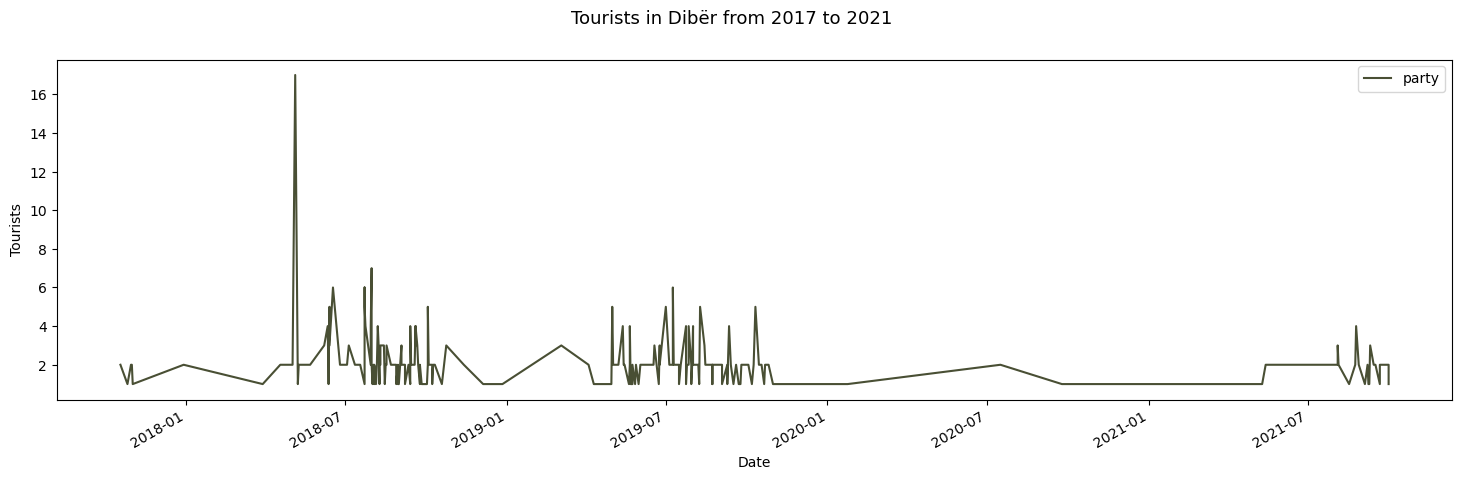

In [306]:
min_date = df['year'].min()
max_date = df['year'].max()

# Plot Average Tourists by Date
fig = df.plot.line(x='date', y='party', figsize=[18,5], color=['#494F34'])

plt.xlabel('Date', fontsize=10)
plt.ylabel('Tourists', fontsize=10)
plt.suptitle(f'Tourists in Dibër from {min_date} to {max_date}', fontsize = 13)

/var/folders/tb/8n29tk616h3_0cwcyyfldbfc0000gn/T/ipykernel_51247/3545487384.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'Tourists')

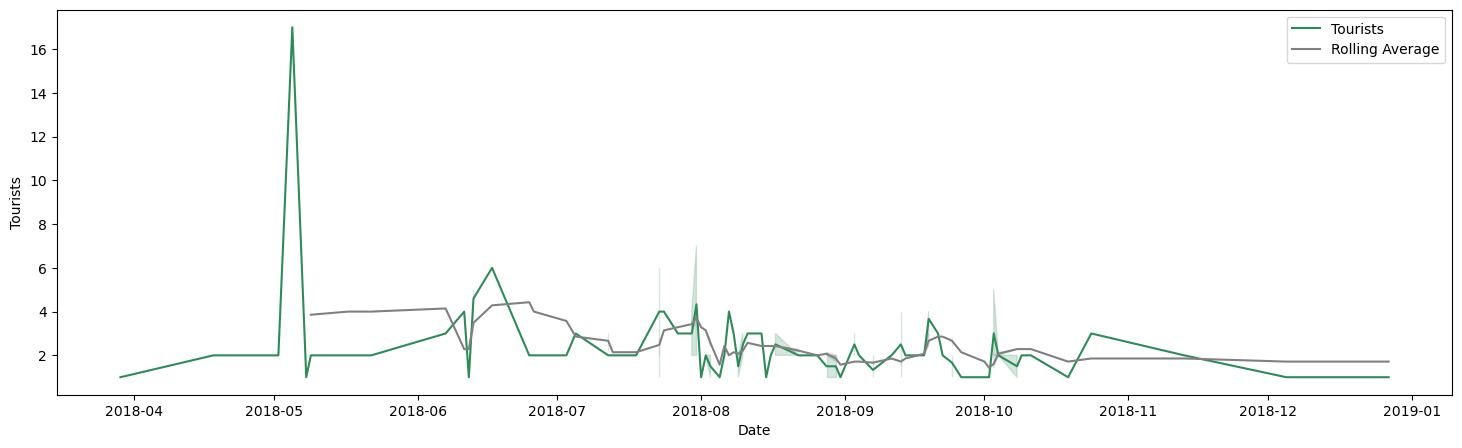

In [304]:
# Plot tourists and 7-day rolling average in 2018

data_plot = df.loc[df['year']==2018]

min_date = data_plot['date'].min()
max_date = data_plot['date'].max()

data_plot[ '7day_rolling_avg' ] = data_plot.party.rolling(7).mean()

# set figure size
plt.figure(figsize = (18, 5))
  
# plot a simple time series plot using seaborn.lineplot()
sns.lineplot(x = 'date',
             y = 'party',
             data = data_plot,
             label = 'Tourists', 
             color = 'seagreen')
  
# plot using rolling average
sns.lineplot(x = 'date',
             y = '7day_rolling_avg',
             data = data_plot,
             label = 'Rolling Average', 
             color = 'grey')


plt.xlabel('Date')

plt.ylabel('Tourists')